<center><img src="https://media.marketrealist.com/brand-img/DhReKnD5j/0x0/uploads/2019/10/online-retailers.jpg" style="width: 700px;"/>

# Capstone Project - OnlineRetail

## Problem Statement :
An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.

+ Using the data, find useful insights about the customer purchasing history that can be an added advantage for the online retailer.
+ Segment the customers based on their purchasing behavior.

## Project Objective
An online retail store is trying to understand the various customer purchase patterns for their firm, you are required to give enough evidence based insights to provide the same.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

### 1. Read the Data

In [2]:
data = pd.read_csv('OnlineRetail.csv', encoding="ISO-8859-1")# Read Data
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


#### Data Description

|Feature | Description|
|-----------|---------|
|InvoiceNo | Invoice number|
|StockCode | Product ID|
|Description | Product Description|
|Quantity | Quantity of the product|
|InvoiceDate | Date of the invoice|
|UnitPrice | Price of the product per unit|
|CustomerID | Customer ID|
|Country | Region of Purchase|

In [3]:
# Shape of the data
data.shape

(541909, 8)

In [4]:
# basics of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
# DataTypes of the Columns
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

### 2. Data Cleaning

In [6]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
# missing values
round(100*(data.isnull().sum())/len(data), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [8]:
# drop all rows having missing values
data = data.dropna()

In [9]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [10]:
#checking the duplicates
data.duplicated().sum()

5225

In [11]:
# Drop duplicates and keep the First occurrence
data = data.drop_duplicates(keep='first')

In [12]:
#checking the duplicates
data.duplicated().sum()

0

In [13]:
data.shape

(401604, 8)

In [14]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
# convert to datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

### 3. Data Visualization

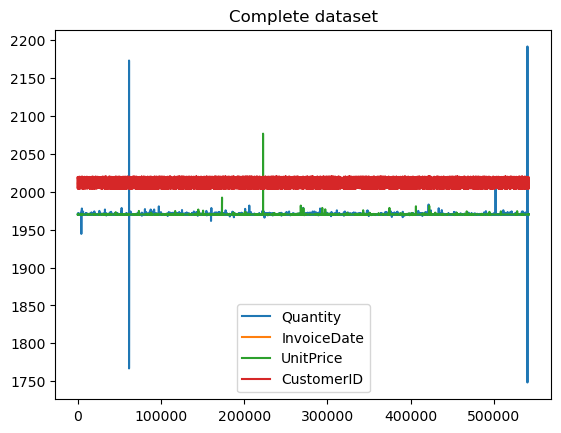

In [16]:
data.plot()
plt.title("Complete dataset")
plt.show()

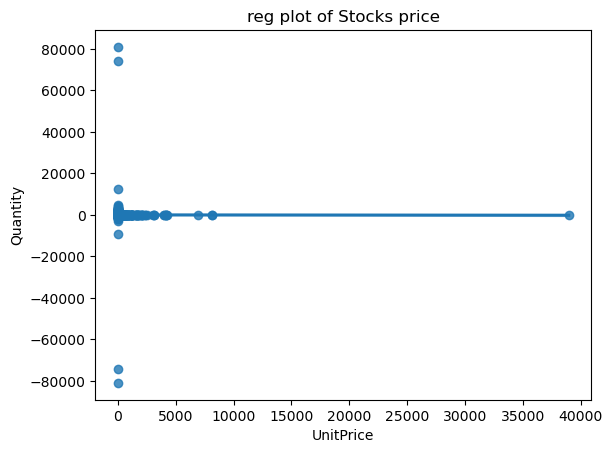

In [17]:
sns.regplot(data = data, x = 'UnitPrice', y = 'Quantity', logistic = False)
plt.title("reg plot of Stocks price")
plt.show()

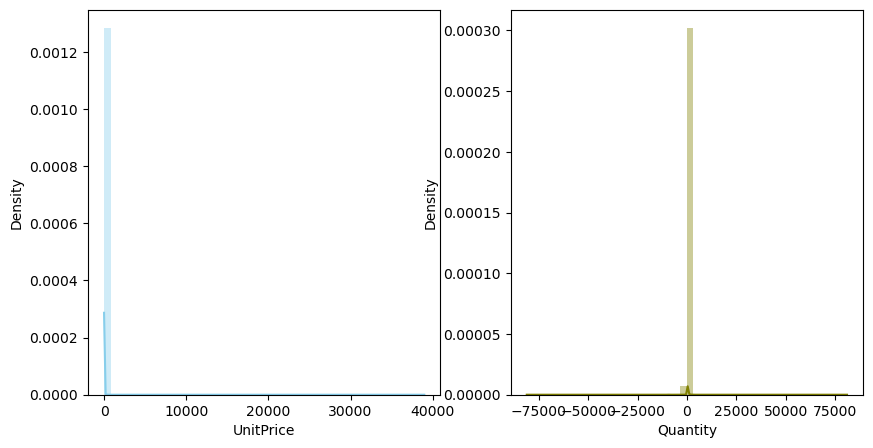

In [18]:
# Create subplots 
f, axes = plt.subplots(1, 2, figsize=(10, 5))

# Plot Histogram plot with Price column
sns.distplot(data["UnitPrice"] , color="skyblue", ax=axes[0])

# Plot Histogram plot with Quantity column
sns.distplot(data["Quantity"] , color="olive", ax=axes[1])
plt.show()

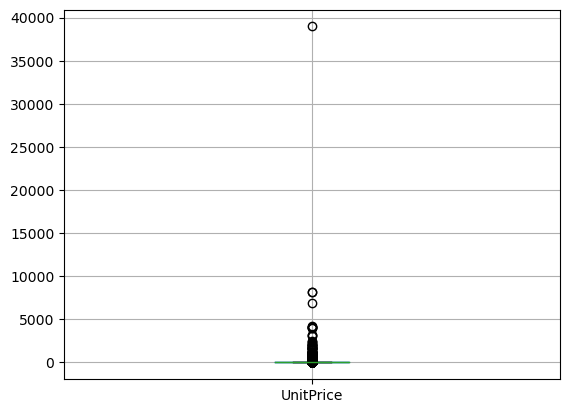

In [19]:
# Boxplots
data.boxplot(column = "UnitPrice")
plt.show()


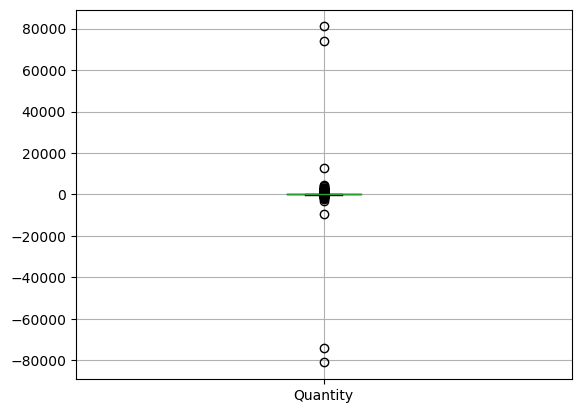

In [20]:
data.boxplot(column = "Quantity")
plt.show()

In [21]:
# Viewing all the Integer columns
ints = data.select_dtypes(exclude = 'object').columns.to_list()
ints

['Quantity', 'InvoiceDate', 'UnitPrice', 'CustomerID']

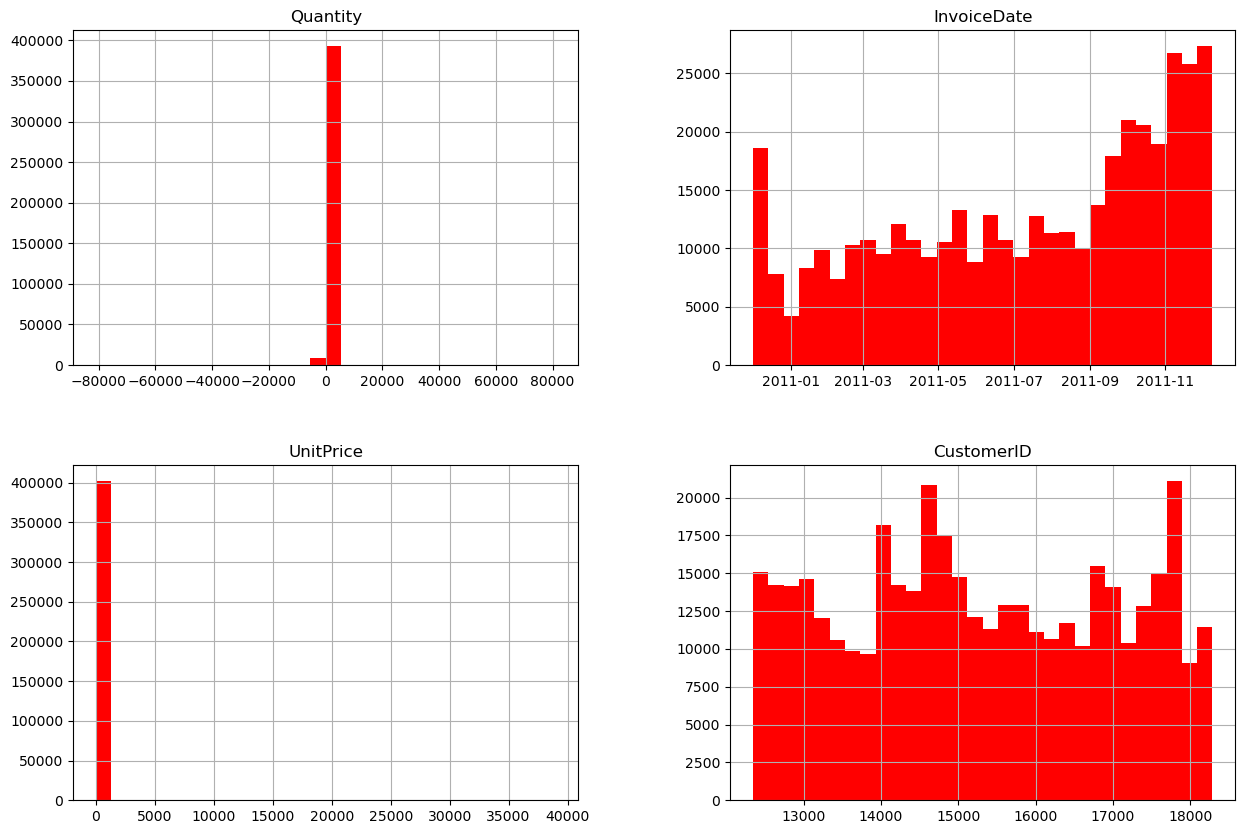

In [22]:
# Histogram

data.hist(color = "r",
        bins = 30,
        figsize = (15, 10))
plt.show()

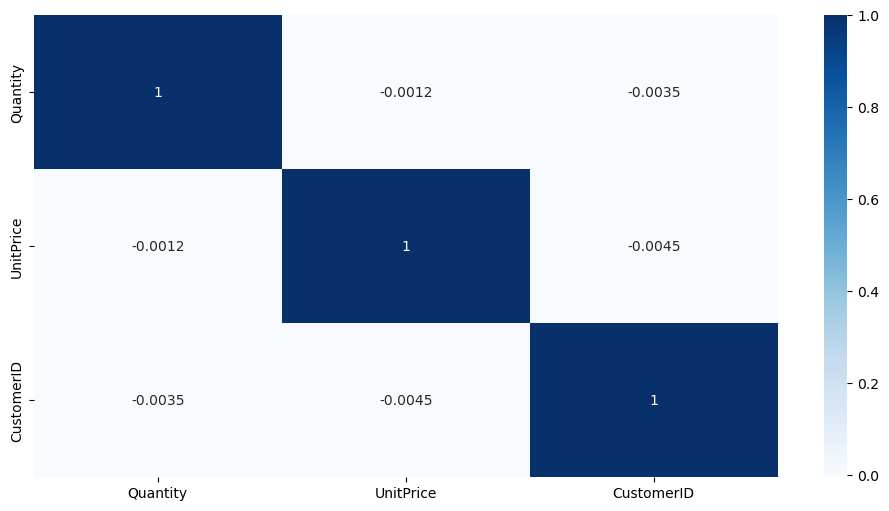

In [23]:
# Heatmap

plt.figure(figsize = (12, 6))
sns.heatmap(data.corr(), annot = True, cmap = "Blues")
plt.show()

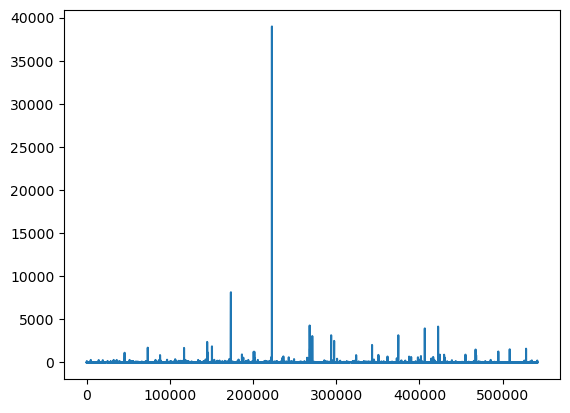

In [24]:
data['UnitPrice'].plot()
plt.show()

## Segment the customers based on their purchasing behavior

### 3. Prepare the data for modelling

- R (Recency): Number of days since last purchase
- F (Frequency): Number of tracsactions
- M (Monetary): Total amount of transactions (revenue contributed)

when did the customer buy the product for last time, how frequent the customer buy the product, and how much the customer pays for the product. We will call this segmentation as RFM segmentation.

In [25]:
# new column: Monetary 
data['Monetary'] = data['Quantity']*data['UnitPrice']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [26]:
# Monetary
grouped_df = data.groupby('CustomerID')['Monetary'].sum()
grouped_df = grouped_df.reset_index()
grouped_df.head()

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [27]:
# frequency
Frequency = data.groupby('CustomerID')['InvoiceNo'].count()
Frequency = Frequency.reset_index()
Frequency.columns = ['CustomerID', 'Frequency']
Frequency.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [28]:
# merge the two dfs
grouped_df = pd.merge(grouped_df, Frequency, on='CustomerID', how='inner')
grouped_df.head()

,CustomerID,Monetary,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [29]:
# recency

In [30]:
# compute the max date
max_date = max(data['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [31]:
# compute the diff
data['diff'] = max_date - data['InvoiceDate']
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Monetary,diff
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,373 days 04:24:00
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,373 days 04:24:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,373 days 04:24:00


In [32]:
# recency
last_purchase = data.groupby('CustomerID')['diff'].min()
last_purchase = last_purchase.reset_index()
last_purchase.head()

,CustomerID,diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [33]:
# merge
grouped_df = pd.merge(grouped_df, last_purchase, on='CustomerID', how='inner')
grouped_df.columns = ['CustomerID', 'Monetary', 'Frequency', 'Recency']
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325 days 02:33:00
1,12347.0,4310.00,182,1 days 20:58:00
2,12348.0,1797.24,31,74 days 23:37:00
3,12349.0,1757.55,73,18 days 02:59:00
4,12350.0,334.40,17,309 days 20:49:00


In [34]:
# number of days only
grouped_df['Recency'] = grouped_df['Recency'].dt.days
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


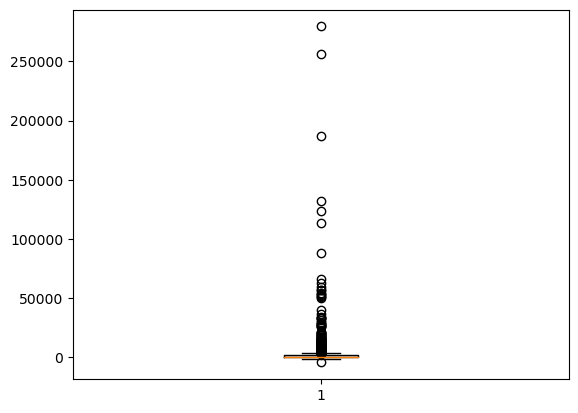

In [35]:
# 1. outlier treatment
plt.boxplot(grouped_df['Monetary'])
plt.show()

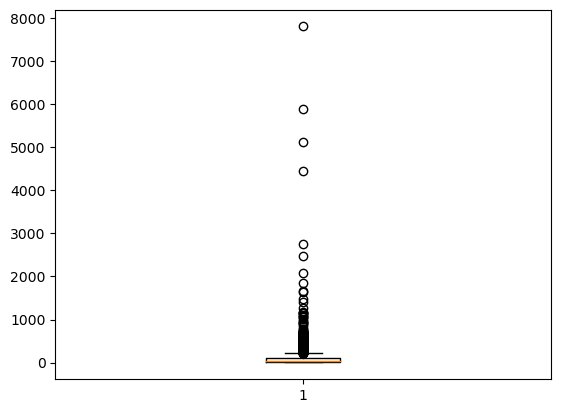

In [36]:
# 2. outlier treatment
plt.boxplot(grouped_df['Frequency'])
plt.show()

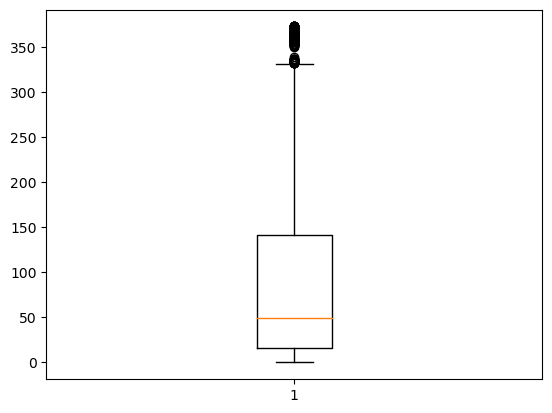

In [37]:
# 3. outlier treatment
plt.boxplot(grouped_df['Recency'])
plt.show()

In [38]:
# Removing (statistical) outliers

# outlier treatment for Monetary
Q1 = grouped_df.Monetary.quantile(0.05)
Q3 = grouped_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Monetary >= Q1 - 1.5*IQR) & (grouped_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for Recency
Q1 = grouped_df.Recency.quantile(0.05)
Q3 = grouped_df.Recency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Recency >= Q1 - 1.5*IQR) & (grouped_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for Frequency
Q1 = grouped_df.Frequency.quantile(0.05)
Q3 = grouped_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
grouped_df = grouped_df[(grouped_df.Frequency >= Q1 - 1.5*IQR) & (grouped_df.Frequency <= Q3 + 1.5*IQR)]



In [39]:
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


**If we look at the plot once more, each variable don’t have the same mean and variance. We have to normalize it.**

In [40]:
# Rescaling
rfm_df = grouped_df[['Monetary', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4295, 3)

In [41]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,-0.722542,-0.750830,2.302166
1,1.735232,1.057112,-0.906150
2,0.302333,-0.459551,-0.183289
3,0.279700,-0.037698,-0.737813
4,-0.531850,-0.600168,2.143731


### 4. Modeling

In [42]:
# k-means with some arbitrary k
kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [43]:
kmeans.labels_

array([0, 1, 2, ..., 2, 3, 2])

### Finding the Optimal Number of Clusters
#### SSD

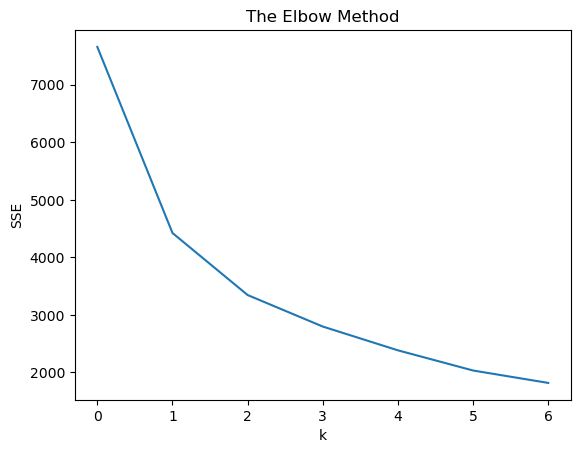

In [45]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
plt.title('The Elbow Method')
plt.xlabel('k')
plt.ylabel('SSE')    
# plot the SSDs for each n_clusters
plt.plot(ssd)
plt.show()

### Silhouette Analysis

$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [46]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
    

For n_clusters=2, the silhouette score is 0.543842560086245
For n_clusters=3, the silhouette score is 0.5096914125042423
For n_clusters=4, the silhouette score is 0.4823453313368587
For n_clusters=5, the silhouette score is 0.46971087046103827
For n_clusters=6, the silhouette score is 0.41923479896613025
For n_clusters=7, the silhouette score is 0.41578198468931105
For n_clusters=8, the silhouette score is 0.41560006081530204


In [47]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [48]:
kmeans.labels_

array([1, 0, 2, ..., 2, 0, 2])

In [49]:
# assign the label
grouped_df['cluster_id'] = kmeans.labels_
grouped_df.head()

,CustomerID,Monetary,Frequency,Recency,cluster_id
0,12346.0,0.00,2,325,1
1,12347.0,4310.00,182,1,0
2,12348.0,1797.24,31,74,2
3,12349.0,1757.55,73,18,2
4,12350.0,334.40,17,309,1


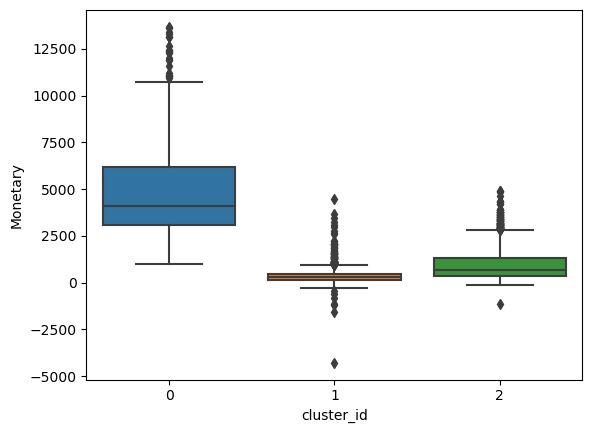

In [50]:
# plot Monetary
sns.boxplot(x='cluster_id', y='Monetary', data=grouped_df)
plt.show()

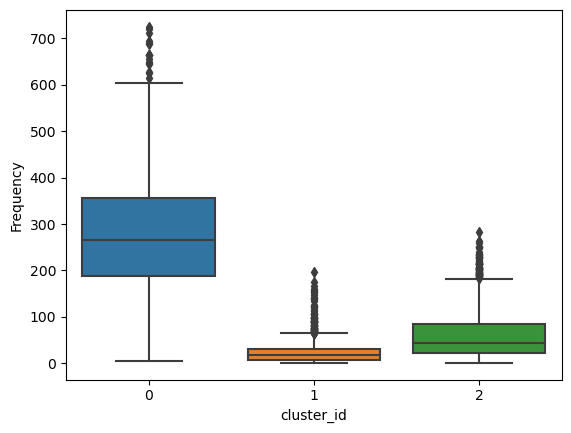

In [51]:
# plot Frequency
sns.boxplot(x='cluster_id', y='Frequency', data=grouped_df)
plt.show()

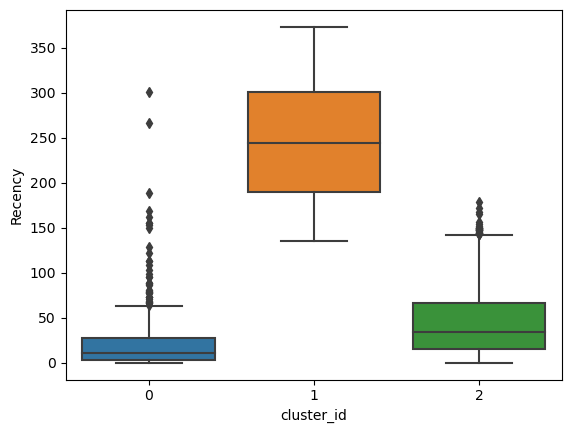

In [52]:
# plot Recency
sns.boxplot(x='cluster_id', y='Recency', data=grouped_df)
plt.show()

### Save your model for each project.

In [53]:
import pickle
  
# Save the trained model as a pickle string.
saved_model = pickle.dumps(kmeans)
# Interpret The Segment
rfm_df["Cluster"] = kmeans.labels_
rfm_df.groupby('Cluster').agg({
    'Recency':'mean',
    'Frequency':'mean',
    'Monetary':['mean', 'count']}).round(2)

Recency Frequency Monetary      
           mean      mean     mean count
Cluster                                 
0         21.81    285.33  4901.05   498
1        248.30     25.17   387.12  1068
2         44.44     58.88   948.28  2729

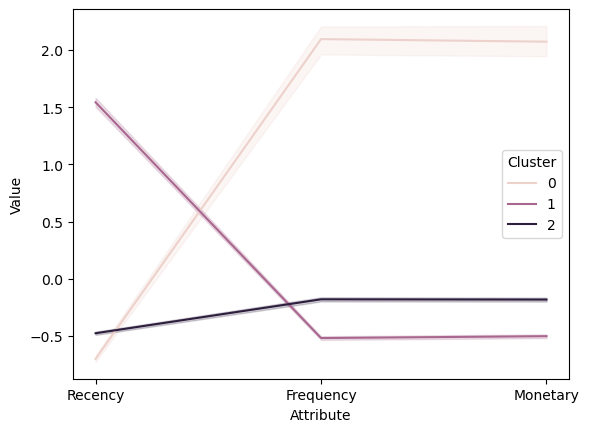

In [54]:
# Create the dataframe
rfm_df_scaled = pd.DataFrame(rfm_df_scaled, columns=['Recency', 'Frequency', 'Monetary'])
rfm_df_scaled['ID'] = rfm_df.index
rfm_df_scaled['Cluster'] = kmeans.labels_
# Melt The Data
df_nor_melt = pd.melt(rfm_df_scaled.reset_index(),
                      id_vars=['ID', 'Cluster'],
                      value_vars=['Recency','Frequency','Monetary'],
                      var_name='Attribute',
                      value_name='Value')
df_nor_melt.head()

# Visualize it
sns.lineplot(x = 'Attribute', y= 'Value', hue='Cluster', data=df_nor_melt)
plt.show()

### RESULT:

I infer that cluster 0 is less frequent, less to spend, but they buy the product recently. Therefore, it could be the cluster of new customer.

Then, I infer that cluster 1 is frequent, spend more, and they buy the product recently. Therefore, it could be the cluster of a loyal customer.

Finally, the cluster 2 is less frequent, less to spend, and they buy the product at the old time. Therefore, it could be the cluster of churned customers.
